In [1]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import mplfinance as mpf

## Preparing data

In [2]:
df = yf.download('NVDA','2022-06-01', '2023-01-01')

[*********************100%***********************]  1 of 1 completed


In [3]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-06-01,187.240005,190.529999,181.220001,183.199997,183.010010,54451400
2022-06-02,182.919998,196.190002,181.979996,195.919998,195.716827,64865600
2022-06-03,190.820007,193.320007,185.220001,187.199997,187.005859,59877900
2022-06-06,191.389999,193.369995,185.639999,187.860001,187.665161,42240600
2022-06-07,184.720001,190.000000,181.880005,189.259995,189.063736,38891400


In [4]:
df.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

## Ploting price chart

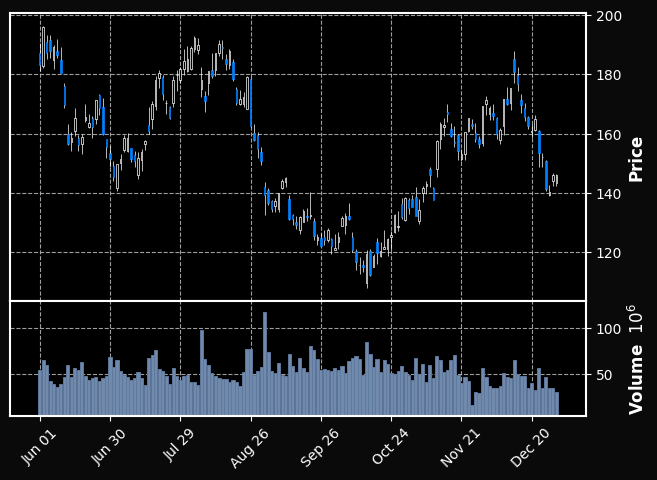

In [5]:
mpf.plot(df, type='candle', style='mike', volume=True)

## Calculating macd

In [6]:
slow_ma=12; fast_ma=26; signal=9
df['slow_ma'] = df['Close'].ewm(span=slow_ma).mean()
df['fast_ma'] = df['Close'].ewm(span=fast_ma).mean()
df['macd'] = df['slow_ma'] - df['fast_ma']
df['signal'] = df['macd'].ewm(span=signal).mean()
df['diff'] = df['macd'] - df['signal']
df.head()

,Open,High,Low,Close,Adj Close,Volume,slow_ma,fast_ma,macd,signal,diff
Date,,,,,,,,,,,
2022-06-01,187.240005,190.529999,181.220001,183.199997,183.010010,54451400,183.199997,183.199997,0.000000,0.000000,0.000000
2022-06-02,182.919998,196.190002,181.979996,195.919998,195.716827,64865600,190.089998,189.804613,0.285385,0.158547,0.126838
2022-06-03,190.820007,193.320007,185.220001,187.199997,187.005859,59877900,188.962030,188.868800,0.093230,0.131778,-0.038548
2022-06-06,191.389999,193.369995,185.639999,187.860001,187.665161,42240600,188.614162,188.586784,0.027379,0.096412,-0.069034
2022-06-07,184.720001,190.000000,181.880005,189.259995,189.063736,38891400,188.789633,188.742904,0.046729,0.081632,-0.034904


## Ploting final chart

In [15]:
indicators = [
    mpf.make_addplot((df['macd']), panel=2),
    mpf.make_addplot((df['signal']), panel=2, color='gray'),
    mpf.make_addplot((df['diff']), type='bar', panel=2, ylabel='MACD', secondary_y=False, color='orange')
]

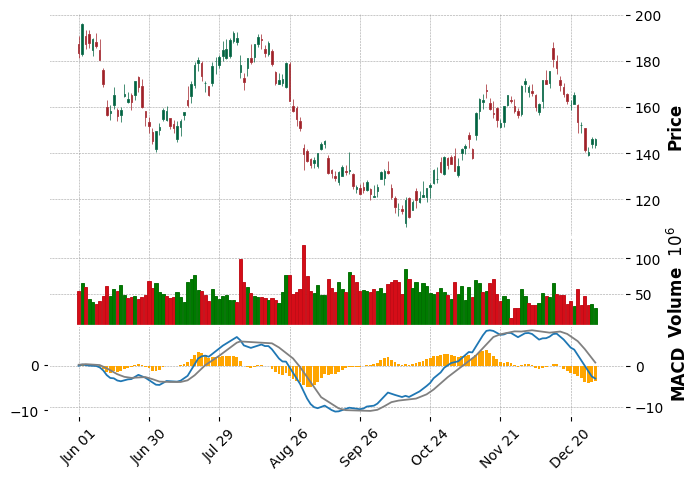

In [16]:
mpf.plot(df, type='candle', style='charles', volume=True, addplot=indicators)